<a href="https://colab.research.google.com/github/abhstract/my-code/blob/master/WSCI_TBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import random  
import matplotlib.pyplot as plt 
import math
from sklearn.linear_model import LinearRegression
import statistics

In [30]:
data = [] 
temp = []
gamma = 2.2
beta = 1.5
    
n = 40
for i in range(n):   
    data.append(random.weibullvariate(gamma,beta))
    temp.append(data[i])

In [31]:
MTBO = statistics.mean(data)
STBO = math.sqrt(statistics.variance(data))
data.sort()

In [32]:
ln_TBO = []
ln_F = []
for i in range(n):
    ln_TBO.append(math.log(data[i]))
    ln_F.append(math.log(math.log(1/(1-(i+0.5)/n))))

In [33]:
X = np.array(ln_TBO)
X = X.reshape(-1,1)
y = np.array(ln_F)

reg = LinearRegression().fit(X,y)
reg.score(X,y)
beta_est = reg.coef_[0]
gamma_est = math.exp(-1*reg.intercept_/beta_est)
print(beta_est)
print(gamma_est)

1.5836979738385295
1.9264402904979128


In [34]:
LCL = gamma_est*math.pow((math.log(1/0.975)),1/beta_est)
UCL = gamma_est*math.pow((math.log(2/0.05)),1/beta_est)
print(UCL)
print(LCL)

4.392499535089642
0.18907114851432733


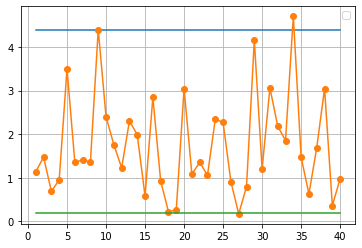

In [36]:
j = [i+1 for i in range(n)]
UC = [UCL for i in range(n)]
LC = [LCL for i in range(n)]
plt.legend(['Control Chart for random data obeying weibull distribution'])
plt.plot(j,UC)
plt.plot(j,temp,'-o')
plt.grid()
plt.plot(j,LC)
plt.show()


In [ ]:
# Expectation of Loss Function
LA = (1/(MTBO*MTBO))*(1 + 3*(STBO/MTBO)*(STBO/MTBO))

In [ ]:
LAbm = 1 # Benchmarking Loss Function - Arbitrary Value
WSCI = LA/LAbm
print("WSCI for TBO: ",WSCI)